<a href="https://colab.research.google.com/github/capajaro/Quiz--4/blob/main/Case1_Quiz_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Quiz 4 - Asignatura Mineria de Datos Uninorte; Case-1
#### **_Estudiante: César Augusto Pájaro Miranda_**

En este notebook lo que haremos es utilizar las funcionalidades de limpieza de datos y visualización de Python para generar los archivos base que se necesitan para generar los modelos usando las librerias de **_"R"_**. Por comodidad en la carga de los datos, se utilizan repositorios públicos de _GitHub_.

# Agenda📃:
1. Limpieza de datos y preprocesamiento
2. Exploración de Base de Datos
3. Generacion modelos usando **_"R"_**
4. Resultados modelo **_"R"_**

Muchas de las secciones del codigo de python son adaptadas del notebook de hannaliavoshka alojado en: 
https://www.kaggle.com/hannaliavoshka/bert-with-disaster-tweets

In [1]:
 # linear algebra and modeling
import numpy as np
from sklearn.model_selection import train_test_split
# data processing, CSV file I/O (e.g. pd.read_csv)
import pandas as pd
#visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# tools for text processing
import re
import string
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')
  

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

Se cargan el archivo de excel alojado en el repositorio de GitHub con la base de datos y se divide la data entre Train y Testing con una proporcion de 70%/30% respectivamente, usando la libreria de scikit-learn https://scikit-learn.org/stable/.

In [2]:
#train and test set
Data = pd.read_excel("https://github.com/capajaro/Quiz--4/blob/main/Data_yelp.xlsx?raw=true", header = None)
Data.columns = ['text', 'target']

X = Data.text
y = Data.target

train_X,test_X,train_y,test_y = train_test_split(X,y,test_size=0.3, random_state=10);

train = pd.DataFrame()
train['text'] = train_X
train['target'] = train_y

test = pd.DataFrame()
test['text'] = test_X
test['target'] = test_y

df = pd.concat([train,test])

# 2. Limpieza de datos y preprocesamiento🧹

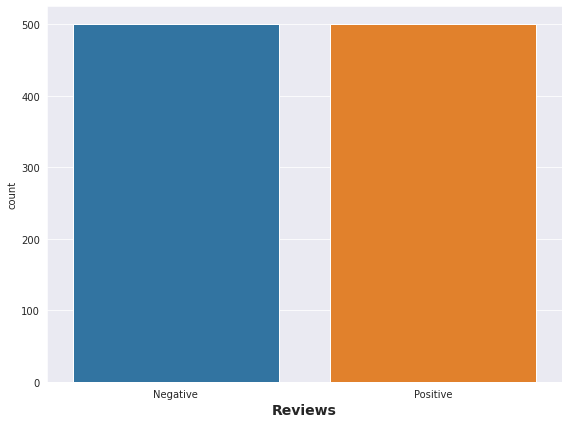

In [3]:
#distribution reviews
sns.set_style("darkgrid")
plt.figure(num=10, figsize=(8, 6))
sns.countplot(x=df.target)
plt.xlabel('Reviews', fontweight='bold', fontsize= 14)
plt.xticks(ticks = [0,1], labels = ["Negative", "Positive"])
plt.tight_layout()


In [4]:
# Se uniran los datasets para mayor operabilidad
df = pd.concat([train,test])
ntrain = train.shape[0]
ntest = test.shape[0]

In [5]:
# function to Make text lowercase, remove text in square brackets,remove links,remove punctuation and remove words containing numbers
# Special thanks to https://www.kaggle.com/andreshg for this function. Check his kernel out - it's great!
def clean_text(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

In [6]:
#Se definen las frases a filtrar
stop_words = stopwords.words('english') + ["u", "im", "ur", "dont", "doin", "ure"]

In [7]:
#final cleaning function presente en el Notebook original de Kaggle
def preprocess_data(text):
    # Clean puntuation, urls, and so on
    text = clean_text(text)
    # Remove stopwords
    text = ' '.join(word for word in text.split(' ') if word not in stop_words)
    return text

In [8]:
#Se crea la variable clean text
df["clean_txt"] = df["text"].apply(preprocess_data)

In [24]:
#se comparan los textos original y procesados
df[["text","clean_txt"]].head().values


array([["I'm not sure how long we stood there but it was long enough for me to begin to feel awkwardly out of place.",
        'sure long stood long enough begin feel awkwardly place'],
       ["I can't wait to go back.", 'cant wait go back'],
       ['We recently witnessed her poor quality of management towards other guests as well.',
        'recently witnessed poor quality management towards guests well'],
       ['On the up side, their cafe serves really good food.',
        'side cafe serves really good food'],
       ["Today is the second time I've been to their lunch buffet and it was pretty good.",
        'today second time ive lunch buffet pretty good']], dtype=object)

# 3. Exploración Base de Datos🧭

Para explorar los datos, lo que haremos sera revisar:
* longitud de cada mensaje
* numero de palabras en cada mensaje
* longitud promedio por palabra
* palabras únicas en cada mensaje
* numero de stopwords por mensaje


Como podemos ver la distribución de palabras entre las reviews positivas y negativas 
en el dataset de entrenamiento es similar


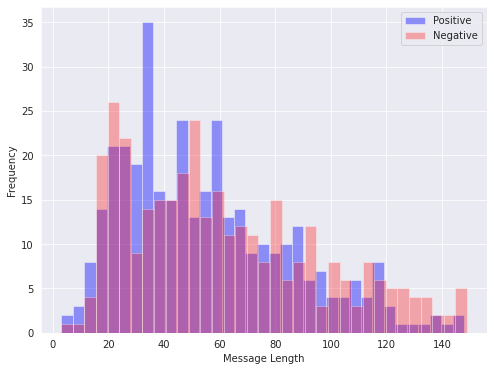

In [11]:
#longitud de cada mensaje
df.text = df.text.astype('str')
train.text = train.text.astype('str')
test.text = test.text.astype('str')

df["Message_Length"] = df.text.apply(lambda x: len(x))

plt.figure(figsize=(8, 6))
train.text.loc[train.target==1].apply(lambda x: len(x)).plot(bins=35, kind='hist', color='blue', label='Positive', alpha=0.4)
train.text.loc[train.target==0].apply(lambda x: len(x)).plot(bins=35, kind='hist', color='red', label='Negative', alpha=0.3)
plt.legend()
plt.xlabel("Message Length")

print('Como podemos ver la distribución de palabras entre las reviews positivas y negativas ')
print('en el dataset de entrenamiento es similar')

Como podemos ver el número de palabras de las reviews positivas y negativas 
en el dataset de entrenamiento es similar


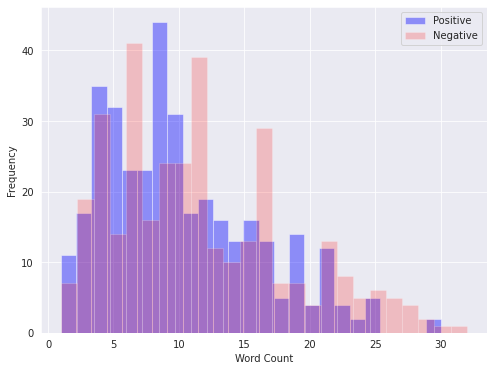

In [12]:
# numero de palabras en cada mensaje
df["Word_Count"] = df.text.str.split().apply(lambda x: len(x))

plt.figure(figsize=(8, 6))
train.text.loc[train.target==1].str.split().apply(lambda x: len(x)).plot(bins=25, kind='hist', color='blue', label='Positive', alpha=0.4)
train.text.loc[train.target==0].str.split().apply(lambda x: len(x)).plot(bins=25, kind='hist', color='red', label='Negative', alpha=0.2)
plt.legend()
plt.xlabel("Word Count")
print('Como podemos ver el número de palabras de las reviews positivas y negativas ')
print('en el dataset de entrenamiento es similar')

Como podemos ver la longitud promedio por palabra entre las reviews positivas y negativas 
en el dataset de entrenamiento presenta una media similar, sin embargo la media de las
reviews negativas parece ser ligeramente menor a la de las reviews positivas


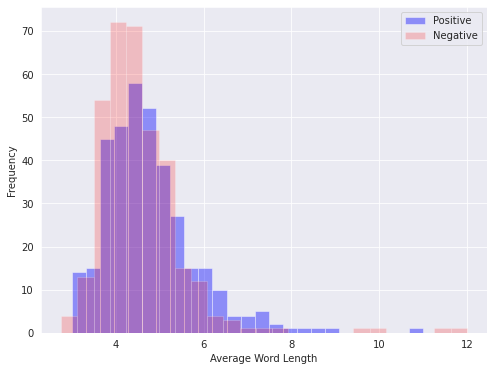

In [14]:
# longitud promedio por palabra
df["Avg_Word"] = df.text.str.split().apply(lambda x: [len(i) for i in x]).map(lambda x: np.mean(x))

plt.figure(figsize=(8, 6))
train.text.loc[train.target==1].str.split().apply(lambda x: [len(i) for i in x]).map(lambda x: np.mean(x)).plot(bins=25, kind='hist', color='blue', label='Positive', alpha=0.4)
train.text.loc[train.target==0].str.split().apply(lambda x: [len(i) for i in x]).map(lambda x: np.mean(x)).plot(bins=25, kind='hist', color='red', label='Negative', alpha=0.2)
plt.legend()
plt.xlabel("Average Word Length")
print('Como podemos ver la longitud promedio por palabra entre las reviews positivas y negativas ')
print('en el dataset de entrenamiento presenta una media similar, sin embargo la media de las')
print('reviews negativas parece ser ligeramente menor a la de las reviews positivas')

In [ ]:
# palabras únicas en cada mensaje
df["Unique_Words"] = df.text.str.split().apply(lambda x: len(set(str(x).split())))
plt.figure(figsize=(8, 6))
train.text.loc[train.target==1].str.split().apply(lambda x: len(set(str(x).split()))).plot(bins=25, kind='hist', color='blue', label='Positive', alpha=0.4)
train.text.loc[train.target==0].str.split().apply(lambda x: len(set(str(x).split()))).plot(bins=25, kind='hist', color='red', label='Negative', alpha=0.2)
plt.legend()
plt.xlabel("Unique Words")

print('Como podemos ver el número de palabras únicas en ambos tipos de review es similar en el dataset de entrenamiento')

Como podemos ver el número de stopwords entre las reviews positivas y negativas 
en el dataset de entrenamiento presenta una media similar, sin embargo la media de las
reviews positivas parece ser ligeramente menor a la de las reviews negativas


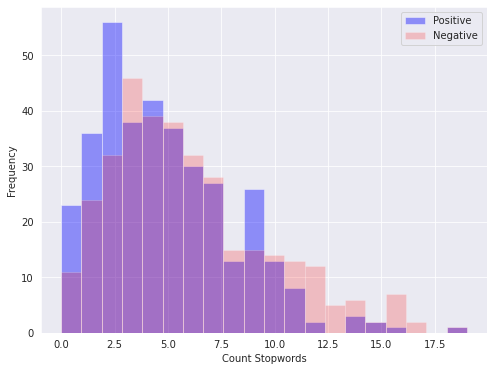

In [18]:
#numero de stopwords por mensaje
from wordcloud import STOPWORDS
df["Stopwords"] = df.text.apply(lambda x: len([w for w in str(x).lower().split() if w in STOPWORDS]))

plt.figure(figsize=(8, 6))
train.text.loc[train.target==1].apply(lambda x: len([w for w in str(x).lower().split() if w in STOPWORDS])).plot(bins=20, kind='hist', color='blue', label='Positive', alpha=0.4)
train.text.loc[train.target==0].apply(lambda x: len([w for w in str(x).lower().split() if w in STOPWORDS])).plot(bins=20, kind='hist', color='red', label='Negative', alpha=0.2)
plt.legend()
plt.xlabel("Count Stopwords")

print('Como podemos ver el número de stopwords entre las reviews positivas y negativas ')
print('en el dataset de entrenamiento presenta una media similar, sin embargo la media de las')
print('reviews positivas parece ser ligeramente menor a la de las reviews negativas')

In [23]:
# Se separan de nuevo las datasets de entrenamiento y validación
train = df[:ntrain]
test = df[ntrain:]
train.to_csv( 'Train_Cleaned.csv',index= False)
train.to_csv( 'Test_Cleaned.csv',index= False)
df.to_csv( 'Data_Cleaned.csv',index= False)

Para la generación de los modelos se utilizaron los textos provesados alojados en la variable Clean_text

In [25]:
#function to process each text seperatly 
def create_corpus(target):
    corpus=[]
    
    for x in train[train['target']==target]['clean_txt'].str.split():
        for i in x:
            corpus.append(i)
    return corpus

Como podemos ver entre las palabras con mas frecuencia en las reviews negativas 
se encuentran el lugar, la comida, volver, el servicio


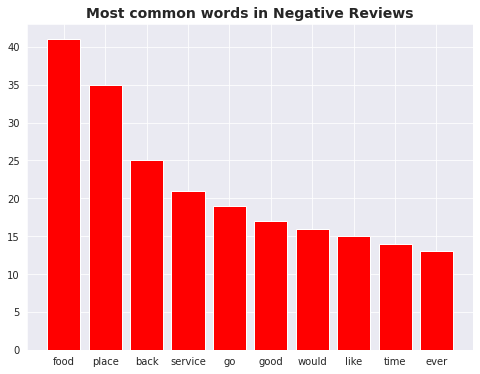

In [32]:
# Se hace una lista para ver la frecuencia de las palabras en las reviews negativas
from collections import defaultdict

corpus=create_corpus(0)

dic=defaultdict(int)
for word in corpus:
        dic[word]+=1
        
top=sorted(dic.items(), key=lambda x:x[1],reverse=True)[:10]

#plot
plt.figure(figsize=(8, 6))
x,y=zip(*top)
plt.bar(x,y, color="red")
plt.title(label="Most common words in Negative Reviews", fontweight='bold', fontsize= 14)

print('Como podemos ver entre las palabras con mas frecuencia en las reviews negativas ')
print('se encuentran el lugar, la comida, volver, el servicio')


Como podemos ver entre las palabras con mas frecuencia en las reviews positivas 
se encuentran los adjetivos bueno, grandioso. Además, se encuentran palabras esperadas tales como
comida, lugar y servicio


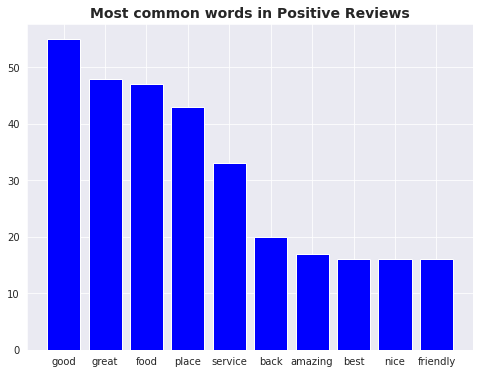

In [33]:
# Se hace una lista para ver la frecuencia de las palabras en las reviews positivas
corpus=create_corpus(1)

dic=defaultdict(int)
for word in corpus:
        dic[word]+=1
        
top=sorted(dic.items(), key=lambda x:x[1],reverse=True)[:10]

#plot
plt.figure(figsize=(8, 6))
x,y=zip(*top)
plt.bar(x,y, color="blue", )
plt.title(label="Most common words in Positive Reviews", fontweight='bold', fontsize= 14)

print('Como podemos ver entre las palabras con mas frecuencia en las reviews positivas ')
print('se encuentran los adjetivos bueno, grandioso. Además, se encuentran palabras esperadas tales como')
print('comida, lugar y servicio')


# 2. Generación de modelos usando **_R_**

In [2]:
# Activando R magic 
%load_ext rpy2.ipython

In [4]:
%%R 
if(!require(tidyverse)) install.packages('tidyverse')
if(!require(text2vec)) install.packages('text2vec')
if(!require(glmnet)) install.packages('glmnet')
if(!require(MLmetrics)) install.packages('MLmetrics')
if(!require(MLmetrics)) install.packages('MLmetrics')
if(!require(tm)) install.packages('tm')
if(!require(SnowballC)) install.packages('SnowballC')
if(!require(e1071)) install.packages('e1071')
if(!require(caret)) install.packages('caret')
if(!require(rpart)) install.packages('rpart')


library(rpart)
library(e1071)
library(tidyverse)
library(text2vec) # text vectorization
library(glmnet) # building model cv.gmlnet()
library(tm)
library(SnowballC)
library(caret)


In [27]:
%%R
#cargando la data Train
Data_Yelp_train = read.csv("https://raw.githubusercontent.com/capajaro/Quiz--4/main/Train_Cleaned.csv")
Data_Yelp_Cleaned_train = Data_Yelp_train[c("clean_txt", "target")]
colnames(Data_Yelp_Cleaned_train) = c("text", "target")
id = 1:nrow(Data_Yelp_Cleaned_train)
Data_Yelp_Cleaned_train = cbind(id,Data_Yelp_Cleaned_train)
Data_Yelp_Cleaned_train$target = as.factor(Data_Yelp_Cleaned_train$target)

# Creando la matriz de palabras
corpus = Corpus(VectorSource(Data_Yelp_Cleaned_train$text))
frequencies = DocumentTermMatrix(corpus)

Matrix_train = as.data.frame(as.matrix(frequencies))
colnames(Matrix_train)= make.names(colnames(frequencies))
Matrix_train$target = as.factor(Data_Yelp_Cleaned_train$target)


In [28]:
%%R

#cargando la data Test
Data_Yelp_test = read.csv("https://raw.githubusercontent.com/capajaro/Quiz--4/main/Test_Cleaned.csv")
Data_Yelp_Cleaned_test = cbind(Data_Yelp_test["clean_txt"],Data_Yelp_test["target"])
colnames(Data_Yelp_Cleaned_test) = c("text", "target")
id = 1:nrow(Data_Yelp_Cleaned_test)
Data_Yelp_Cleaned_test = as.data.frame(cbind(id,Data_Yelp_Cleaned_test))

# Creando la matriz de palabras
corpus = Corpus(VectorSource(Data_Yelp_Cleaned_test$text))
frequencies = DocumentTermMatrix(corpus)

Matrix_test = as.data.frame(as.matrix(frequencies))
colnames(Matrix_test)= make.names(colnames(frequencies))
Matrix_test$target = as.factor(Data_Yelp_Cleaned_test$target)


In [29]:
%%R
Matrix_train$next. = NULL
Matrix_train$else. = NULL
modelo_svm <- svm(formula = target ~., data = Matrix_train, kernel = "linear",
                  cost = 10, scale = FALSE)

predictSVM=predict(modelo_svm,newdata=Matrix_test)

TP_Sp = as.data.frame(table(Matrix_test$target, predictSVM))$Freq[4]
TF_Sp = as.data.frame(table(Matrix_test$target, predictSVM))$Freq[1]
paste0("Accuracy SVM = " ,": ",signif(100*(TP_Sp+TF_Sp)/nrow(Matrix_test), digits = 4), " %")


[1] "Accuracy SVM = : 99.57 %"


In [31]:
%%R
Matrix_train$next. = NULL
Matrix_train$else. = NULL

modelo_rpart = rpart(target ~ ., data=Matrix_train, method="class")

predictRpart=predict(modelo_rpart,newdata=Matrix_test,type="class")

TP_Sp = as.data.frame(table(Matrix_test$target, predictRpart))$Freq[4]
TF_Sp = as.data.frame(table(Matrix_test$target, predictRpart))$Freq[1]
paste0("Accuracy Rpart = " ,": ",signif(100*(TP_Sp+TF_Sp)/nrow(Matrix_test), digits = 4), " %")


[1] "Accuracy Rpart = : 73.29 %"


In [32]:
%%R
Matrix_train$next. = NULL
Matrix_train$else. = NULL
set.seed(123)
modelo_Lasso <- train(
  target ~., data = Matrix_train, method = "glmnet",
  trControl = trainControl("cv", number = 30),
  tuneLength = 30
)

predict_Lasso=predict(modelo_Lasso,newdata=Matrix_test)

TP_Sp = as.data.frame(table(Matrix_test$target, predict_Lasso))$Freq[4]
TF_Sp = as.data.frame(table(Matrix_test$target, predict_Lasso))$Freq[1]
paste0("Accuracy Lasso = " ,": ",signif(100*(TP_Sp+TF_Sp)/nrow(Matrix_test), digits = 4), " %")


[1] "Accuracy Lasso = : 98 %"


Como podemos notar el modelo de SVM presenta la mayor precisión de los modelos testeados, y de mas del 99%. El modelo SVM es el que se recomienda para el analisis de las reviews de los restaurantes.